# Carregar os Dados das Simulações

In [43]:
import pickle
from deposicao import DeposicaoAleatoria, DeposicaoAleatoriaRelaxacaoSuperficial, DeposicaoBalistica

diretorio = {
    DeposicaoAleatoria: 'DA',
    DeposicaoAleatoriaRelaxacaoSuperficial: 'DARS',
    DeposicaoBalistica: 'DB'
}

logscale = {
    DeposicaoAleatoria: False,
    DeposicaoAleatoriaRelaxacaoSuperficial: True,
    DeposicaoBalistica: True
}

#comprimentos_subestratos = [800]
comprimentos_subestratos = [200, 400, 800, 1600]

'''
    Descomente a forma de deposição desejada (Aleatoria, Aleatoria com Relaxação
    Superficial ou Balística) e comente as demais.
'''

#forma_deposicao = DeposicaoAleatoria
#forma_deposicao = DeposicaoAleatoriaRelaxacaoSuperficial
forma_deposicao = DeposicaoBalistica

dados_medios = {}

for L in comprimentos_subestratos:
    f = open('simulacoes/'+ diretorio[forma_deposicao] +'/L_{}'.format(L), 'rb')
    dados_medios[L] = pickle.load(f)
    f.close()

# Plotar a Evolução do Crescimento dos Subestratos

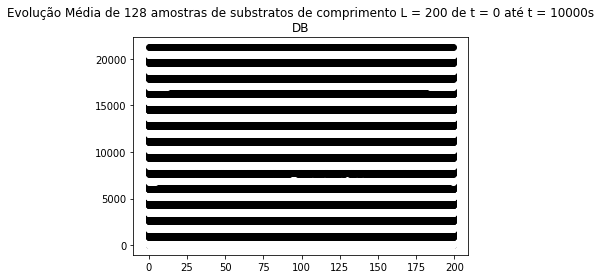

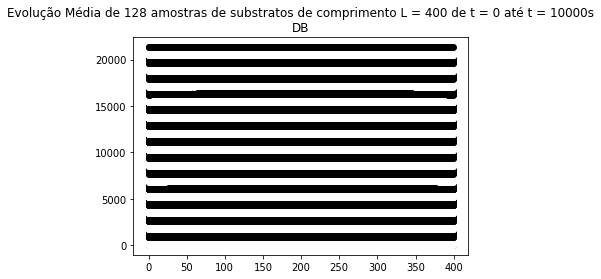

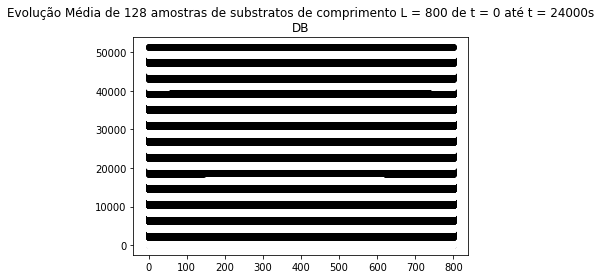

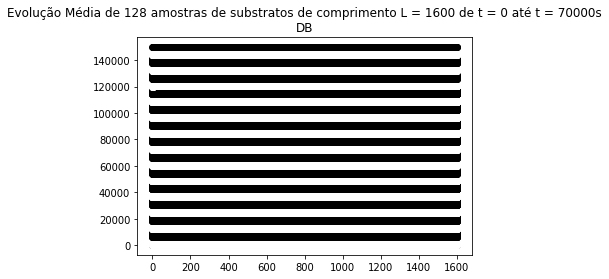

In [44]:
import importlib
import simulacao_utils
importlib.reload(simulacao_utils)

comutar_representacao = lambda r: 'wo' if r == 'ko' else 'ko'

for L in comprimentos_subestratos:
    t_comutacao = dados_medios[L]['snapshots'] // 25
    simulacao_utils.plotar_instantaneos(
        'Evolução Média de {} amostras de substratos de comprimento L = {} de t = 0 até t = {}s\n'.format(
            dados_medios[L]['amostras'],
            L,
            dados_medios[L]['tempo_maximo']
        )
      + diretorio[forma_deposicao],
        dados_medios[L]['interfaces'],
        [dados_medios[L]['evolucao_subestratos'][t] for t in range(dados_medios[L]['snapshots'])],
        t_comutacao = t_comutacao,
        comutar_representacao = comutar_representacao
    )

# Plotar Cada uma das rugosidades dos diferentes subestratos

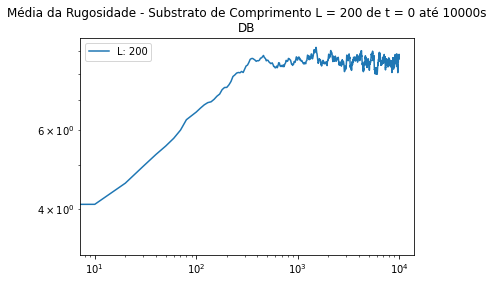

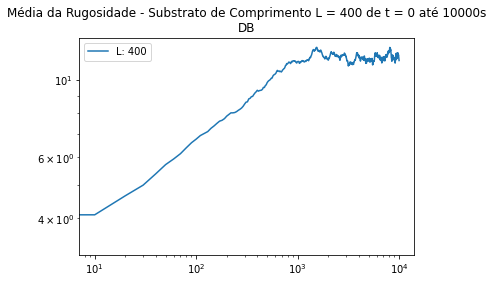

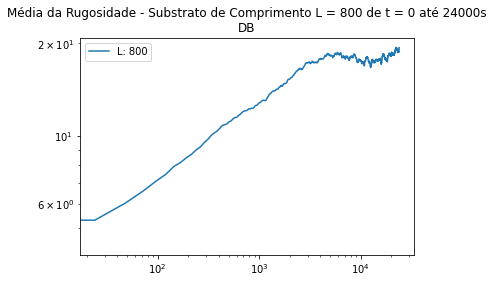

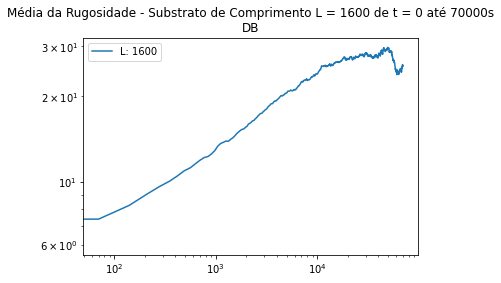

In [45]:
import importlib
import simulacao_utils
import numpy as np
importlib.reload(simulacao_utils)

for L in comprimentos_subestratos:
    simulacao_utils.plotar_rugosidades('Média da Rugosidade - Substrato de Comprimento L = {} de t = 0 até {}s\n'.format(L, dados_medios[L]['tempo_maximo'])
                     + diretorio[forma_deposicao],
                       [
                          np.stack([
                              
                                      dados_medios[L]['rugosidades'], 
                                      np.linspace(0,dados_medios[L]['tempo_maximo'],len(dados_medios[L]['rugosidades']))
                                   ],
                          axis = 0)
                       ],
                       [L],
                       logscale = True)

# Plotar Sobreposição das Curvas de Rugosidade

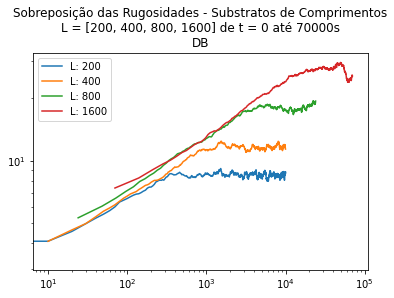

In [46]:
importlib.reload(simulacao_utils)

rugosidades_a_sobrepor = [
    np.stack([
        dados_medios[L]['rugosidades'], 
        np.linspace(0,dados_medios[L]['tempo_maximo'],len(dados_medios[L]['rugosidades']))
        ],
        axis = 0
    )
    for L in comprimentos_subestratos[:1]
]

rugosidades_a_sobrepor += [
    np.stack([
        dados_medios[L]['rugosidades'][1:], 
        np.linspace(0,dados_medios[L]['tempo_maximo'],len(dados_medios[L]['rugosidades']))[1:]
        ],
        axis = 0
    )
    for L in comprimentos_subestratos[1:]
]

simulacao_utils.plotar_rugosidades(
                'Sobreposição das Rugosidades - Substratos de Comprimentos\n'
              + 'L = {} de t = 0 até {}s\n'.format(comprimentos_subestratos, dados_medios[L]['tempo_maximo'])
              + diretorio[forma_deposicao],
                rugosidades_a_sobrepor,
                comprimentos_subestratos,
                logscale = logscale[forma_deposicao]
)

# Plotar Colapso das Curvas de Rugosidade

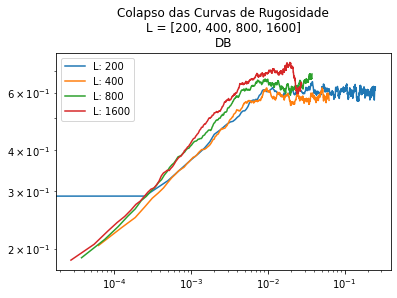

In [47]:
simulacao_utils.plotar_rugosidades(
                'Colapso das Curvas de Rugosidade\n'
              + 'L = {}\n'.format(comprimentos_subestratos)
              + diretorio[forma_deposicao],
                rugosidades_a_sobrepor,
                comprimentos_subestratos,
                logscale = logscale[forma_deposicao],
                colapso = True
)

# Obtenção dos parâmetros $\alpha$ $\beta$ e $z$

Estudando a sobreposição das curvas podemos determinar os parâmetros $\alpha$, $z$ e consequentemente $\beta$ que é $\frac{\alpha}{z}$

$\alpha$ é obtido pela inclinação da reta da rugosidade de saturação $\omega_{sat}$ em função do comprimento $L$ do subestrato

Já $z$ é obtido pela inclinação da reta do tempo de saturação $t_x$ em função do comprimento $L$ do subestrato

### Definição de $\omega_{sat}$

In [48]:
w_sat = {L: dados_medios[L]['rugosidades'][-1] for L in comprimentos_subestratos}


### Definição de $t_{x}$

In [53]:
import pdb
from matplotlib import pyplot

t_x = {}
for L in comprimentos_subestratos:
    intervalo_tempo = np.linspace(0,dados_medios[L]['tempo_maximo'],len(dados_medios[L]['rugosidades']))[1:]
    intervalo_tempo_log = np.log10(intervalo_tempo)
    rugosidades_log = np.log10(dados_medios[L]['rugosidades'][1:])
    
    t_log_max = np.int32(np.floor(intervalo_tempo_log[-1]))
    for t in range(1, t_log_max + 1):
        filtro = (intervalo_tempo_log > (t - 1)) & (intervalo_tempo_log < t)
        sub_intervalo_tempo = intervalo_tempo_log[filtro]
        sub_intervalo_rugosidades = rugosidades_log[filtro]
        slope = (sub_intervalo_rugosidades[-1] - sub_intervalo_rugosidades[0])\
              / (sub_intervalo_tempo[-1] - sub_intervalo_tempo[0])\
              if len(sub_intervalo_tempo) > 0\
              else np.inf
        if slope < 0.08:
            t_x[L] = intervalo_tempo[filtro][-1]

inf 200
0.2069459519791719 200
0.1161878026007146 200
0.012142976553621792 200
inf 400
0.2171754082281442 400
0.22339966888586188 400
0.004829705719536561 400
inf 800
0.21076822642754692 800
0.25222359978462966 800
0.1394309619112439 800
inf 1600
nan 1600
0.22856110415550626 1600
0.25898387565135805 1600


<ipython-input-53-dba3f5f6d4cf>:15: RuntimeWarning: invalid value encountered in double_scalars
  slope = (sub_intervalo_rugosidades[-1] - sub_intervalo_rugosidades[0])\


### Cálculo de $\alpha$

| $L$ | $\omega_{sat}$ |
| --- | --- |
| 200 | {{'{:.2f}'.format(w_sat[200])}} |
| 400 | {{'{:.2f}'.format(w_sat[400])}} |
| 800 | {{'{:.2f}'.format(w_sat[800])}} |
| 1600 | {{'{:.2f}'.format(w_sat[1600])}} |

#### Gráfico

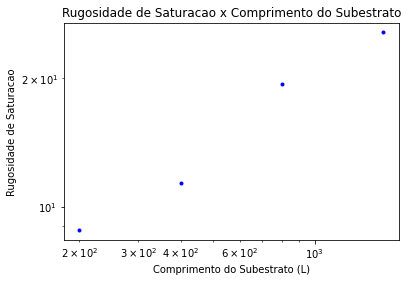

In [50]:
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import matplotlib._color_data as mcd
import pdb
import numpy as np

%matplotlib inline


pyplot.title('Rugosidade de Saturacao x Comprimento do Subestrato')
pyplot.xlabel('Comprimento do Subestrato (L)')
pyplot.xscale('log')
pyplot.ylabel('Rugosidade de Saturacao')
pyplot.yscale('log')
pyplot.plot(comprimentos_subestratos, [w_sat[L] for L in comprimentos_subestratos], 'b.');

#### Estimativa do parâmetro $\alpha$

In [51]:
from scipy.stats import linregress

alpha, *_ = linregress(np.log10(comprimentos_subestratos), np.log10([w_sat[L] for L in comprimentos_subestratos]))

print('α = {:.2f}'.format(alpha))

α = 0.54


### Cálculo de $ z $

| $L$ | $\omega_{sat}$ |
| --- | --- |
| 200 | {{'{:.2f}'.format(t_x[200])}} |
| 400 | {{'{:.2f}'.format(t_x[400])}} |
| 800 | {{'{:.2f}'.format(t_x[800])}} |
| 1600 | {{'{:.2f}'.format(t_x[1600])}} |

#### Gráfico

KeyError: 800

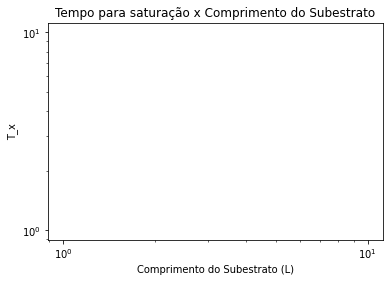

In [52]:
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import matplotlib._color_data as mcd
import pdb
import numpy as np

%matplotlib inline


pyplot.title('Tempo para saturação x Comprimento do Subestrato')
pyplot.xlabel('Comprimento do Subestrato (L)')
pyplot.xscale('log')
pyplot.ylabel('T_x')
pyplot.yscale('log')
pyplot.plot(comprimentos_subestratos, [t_x[L] for L in comprimentos_subestratos], 'b.');

#### Estimativa do parâmetro $z$

In [42]:
from scipy.stats import linregress

z, *_ = linregress(np.log10(comprimentos_subestratos), np.log10([t_x[L] for L in comprimentos_subestratos]))

print('z = {:.2f}'.format(z))

z = 1.99
